In [ ]:
import pandas as pd
import numpy as np

# 1. Define Parameters
num_students = 200
classes = ['Class A', 'Class B', 'Class C', 'Class D']

# 2. Generate Data 
data = {
    'student_id': range(1, num_students + 1),
    'name': [f'Student_{i}' for i in range(1, num_students + 1)],
    'class': np.random.choice(classes, num_students),
    
    # Cognitive Skills (scale 1-10)
    'comprehension': np.random.randint(1, 11, num_students),
    'attention': np.random.randint(1, 11, num_students),
    'focus': np.random.randint(1, 11, num_students),
    'retention': np.random.randint(1, 11, num_students),
    
    # Engagement Time in minutes (e.g., per week)
    'engagement_time': np.random.randint(30, 300, num_students)
}

df = pd.DataFrame(data)

# 3. Create a Realistic Assessment Score
# Score is a weighted sum of skills + some random noise
df['assessment_score'] = (
    df['comprehension'] * 4 +
    df['retention'] * 3 +
    df['focus'] * 2 +
    df['attention'] * 1 +
    (df['engagement_time'] / 30) + # Bonus for engagement
    np.random.randint(-5, 5, num_students) # Add some randomness
).astype(int)

# Ensure scores are within a realistic range (e.g., 0-100)
df['assessment_score'] = np.clip(df['assessment_score'], 0, 100)

# 4. Save to CSV
df.to_csv('student_data.csv', index=False)

print("Dataset created successfully!")
df.head()

Dataset created successfully!


,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,1,Student_1,Class A,4,1,3,1,236,35
1,2,Student_2,Class C,9,5,1,3,264,63
2,3,Student_3,Class D,5,1,9,9,294,70
3,4,Student_4,Class D,4,9,10,7,94,70
4,5,Student_5,Class A,7,6,3,8,152,72


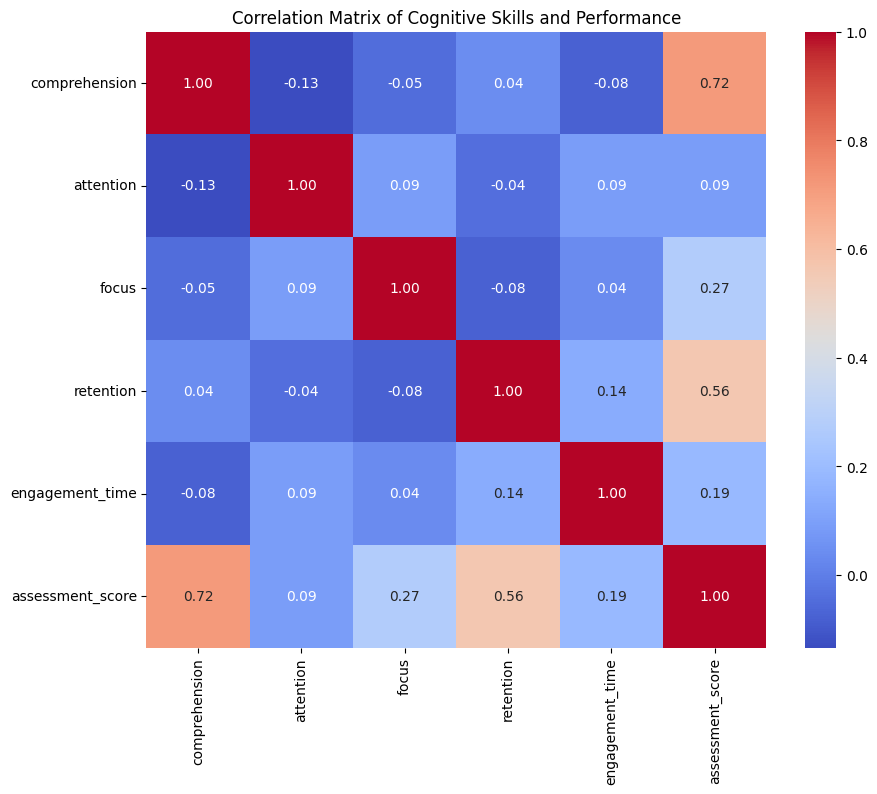

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
cognitive_cols = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time', 'assessment_score']
correlation_matrix = df[cognitive_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Cognitive Skills and Performance')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define Features (X) and Target (y)
features = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time']
X = df[features]
y = df['assessment_score']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Performance:
Mean Squared Error: 9.80
R-squared (R²): 0.96


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Select features for clustering
cluster_features = ['comprehension', 'attention', 'focus', 'retention', 'assessment_score']
X_cluster = df[cluster_features]

# 2. Scale the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 3. Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Using 3 clusters/personas
df['persona'] = kmeans.fit_predict(X_scaled)

# 4. Analyze the personas
persona_map = {0: 'High Achievers', 1: 'Needs Attention', 2: 'Average Students'}
df['persona_name'] = df['persona'].map(persona_map)

# Display the average stats for each persona
print(df.groupby('persona_name')[cluster_features].mean())

# 5. Final Step: Save the processed data for the dashboard 
df.to_csv('student_data_processed.csv', index=False)

                  comprehension  attention     focus  retention  \
persona_name                                                      
Average Students       7.765432   4.765432  5.037037   7.234568   
High Achievers         3.721311   4.327869  2.983607   4.163934   
Needs Attention        3.982759   7.448276  7.655172   4.448276   

                  assessment_score  
persona_name                        
Average Students         72.666667  
High Achievers           41.983607  
Needs Attention          56.155172  
